# Homework 2

----
Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por:

```
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
```
De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante...

----

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)

## Linear Regression Model:

In [65]:
def linear_regression_model():

  '''Returns the coefficient and the intercept of
   the linear regression model'''

  lr = LinearRegression()
  X = 2 * np.random.rand(100,1)
  Y  = 4 + 3 * X + np.random.rand(100,1) 
  lr.fit(X,Y)

  return lr.coef_[0][0], lr.intercept_[0]

In [66]:
# One example:

coef, intercep = linear_regression_model()
print(f'Coefficient:  {coef}, Intercept: {intercep}')

Coefficient:  3.0351455624834065, Intercept: 4.443148930467176


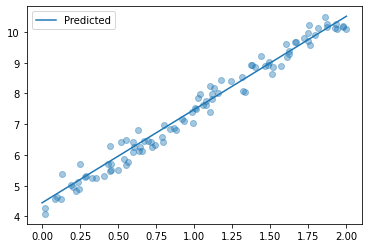

In [71]:
# Plot of the data and the linear regression model of the example above

X = np.linspace(0, 2, 100)
plt.scatter(x, y, alpha=0.4)
plt.plot(X, coef*X + intercep, label='Predicted')
plt.legend()

## Training 1000 Instances of Linear Regression

In [56]:
# Arrays of 1000 Trains:
coefs = [linear_regression_model()[0] for i in range(1000)]
interceps  = [linear_regression_model()[1] for i in range(1000)]

In [57]:
def graph(param):

  '''Shows the distribution of the parameters.
  Makes a box plot and histogram with an overlapping Standard Normal Distribution'''
  
  # Standardization
  norm_param = (param - np.mean(param))/np.std(param)

  # Gaussian Distribution
  X = np.linspace(-4, 4, 100)
  norm = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)

  # Plot
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  sns.lineplot(ax=axes[0], x=X, y=norm(X), label='Gaussian distribution')
  sns.distplot(ax=axes[0], x=norm_param, color='violet')
  sns.boxplot(ax=axes[1], x=norm_param)

  return np.mean(param), np.std(param)

## Histogram and a box plot

**Statistical Distribution of the parameter 'intercep' of the linear regression model**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean value of the intercep is:  4.50 +/- 0.06


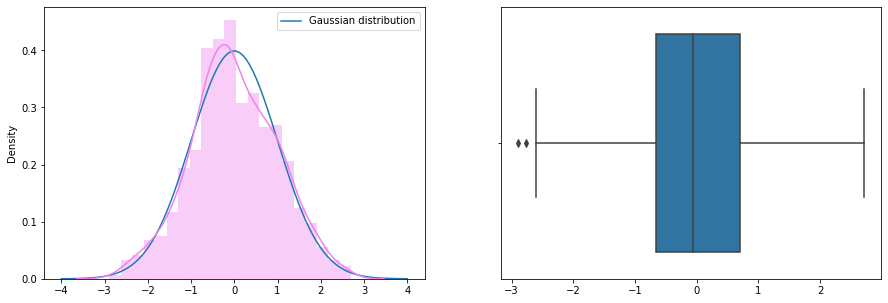

In [58]:
interceps_mean, interceps_std = graph(interceps)
print(f'The mean value of the intercep is:  {interceps_mean:.2f} +/- {interceps_std:.2f}')

**Statistical Distribution of the parameter 'coefficient' of the linear regression model**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean value of the coefficient is: 3.00 +/- 0.05


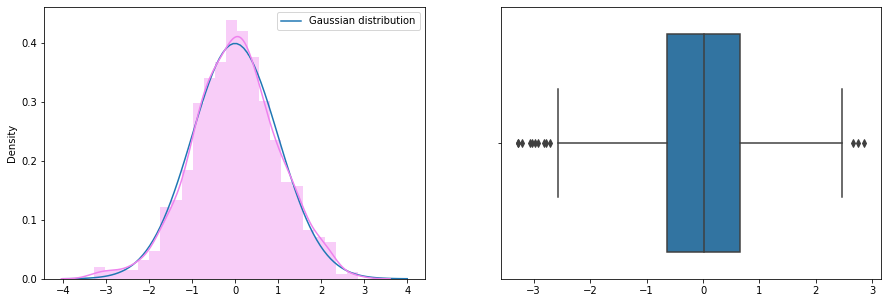

In [59]:
coefs_mean, coefs_std = graph(coefs)
print(f'The mean value of the coefficient is: {coefs_mean:.2f} +/- {coefs_std:.2f}')

If $ y $ is an unbiased predictor, it has the form:
$$\hat y = 4 + 3 \hat x + \hat  \epsilon
$$ 

Where $\epsilon$ is the error. 

After the 1000 trainings, the intersection and the linear regression coefficient show a Gaussian distribution. In each iteration, the `numpy.random.rand` function was called. This function creates random samples from a uniform distribution over [0, 1). That means that the iterations are taking an average over the error and its statistical distribution is Gaussian with an expected value of $ 0.5 $. So also the intersection prediction gives $ 4.50 \pm 0.06 $.

The coefficient gives $ 3.00 \pm 0.05$ as expected. And the standard deviations are small.


